***`Importing the libararies for different purpose`***

In [ ]:
from keras.datasets import cifar10 #For importing the dataset
from keras.utils import np_utils #Converting the class vector into binary matrix
import matplotlib.pyplot as plt #For plotting the graph
from keras.models import Sequential # Linear stack layer 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense #Design the convocutional neural network

***`Loading the dataset and seprating them into test and train. The data is loaded from the keras libaray the dataset is named as cifar.`***

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
#Covert the test and train dataset into normal for convert the image on the scale of 0 to 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

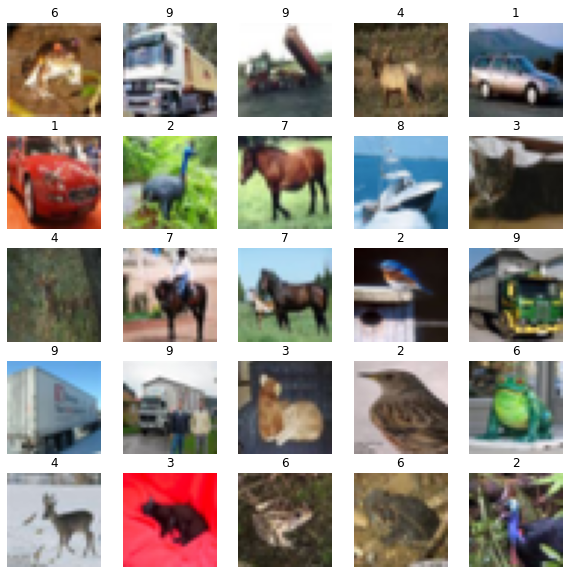

In [ ]:
# Visualize the first 25 images in the training dataset
#Divide the plotting space into 5 rows and columns
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
#For the rows
for i in range(5):
#For the columns
    for j in range(5):
#For showing the image
        ax[i][j].imshow(x_train[i * 5 + j])
#Print the axis
        ax[i][j].axis('off')
        ax[i][j].set_title(y_train[i * 5 + j][0])
plt.show()


In [ ]:
#Convert the class vector into the binary matrix
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64)


Epoch 1/10
782/782 [==============================] - 42s 53ms/step - loss: 1.5826 - accuracy: 0.4216
Epoch 2/10
782/782 [==============================] - 42s 54ms/step - loss: 1.2252 - accuracy: 0.5625
Epoch 3/10
782/782 [==============================] - 41s 52ms/step - loss: 1.0689 - accuracy: 0.6238
Epoch 4/10
782/782 [==============================] - 42s 54ms/step - loss: 0.9640 - accuracy: 0.6621
Epoch 5/10
782/782 [==============================] - 44s 56ms/step - loss: 0.8898 - accuracy: 0.6888
Epoch 6/10
782/782 [==============================] - 42s 54ms/step - loss: 0.8224 - accuracy: 0.7121
Epoch 7/10
782/782 [==============================] - 41s 52ms/step - loss: 0.7757 - accuracy: 0.7295
Epoch 8/10
782/782 [==============================] - 42s 53ms/step - loss: 0.7375 - accuracy: 0.7413
Epoch 9/10
782/782 [==============================] - 40s 52ms/step - loss: 0.6967 - accuracy: 0.7574
Epoch 10/10
782/782 [==============================] - 41s 53ms/step - loss: 0.659

In [ ]:
#Check the accuracy of model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:::::', score[0])
print('Test accuracy:::::', score[1])

Test loss::::: 0.8469083905220032
Test accuracy::::: 0.7070000171661377
